In [1]:
import pandas as pd
import re
import nltk
import gensim

train_df = pd.read_csv("../kaggle_data/train_data.txt",
                       engine="python",
                       sep=" ::: ",
                       names=['id', "movie", "genre", "summary"])

test_df = pd.read_csv("../kaggle_data/test_data_solution.txt",
                      engine="python",
                      sep=" ::: ",
                      names=['id', "movie", "genre", "summary"])


In [2]:
# Save the DataFrame to a CSV file
train_df.to_csv('train_data_output.csv', index=False)
test_df.to_csv('test_data_output.csv', index=False)

# Load the two DataFrames from CSV files
df1 = pd.read_csv('test_data_output.csv')
df2 = pd.read_csv('train_data_output.csv')

# Concatenate the two DataFrames along the rows
merged_data = pd.concat([df1, df2], axis=0, ignore_index=True)

# Save the concatenated DataFrame to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

In [3]:
df_merged = pd.read_csv('merged_data.csv')

In [4]:
df_merged

,id,movie,genre,summary
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...
...,...,...,...,...
108409,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
108410,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
108411,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
108412,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [5]:
# final data for processing Remove the columns
df = df_merged.drop(columns=['id'], axis=1)
df = df.sample(frac=1)
df

,movie,genre,summary
81624,I'm Not There (2009),biography,A masseuse is hired to massage all the guests ...
31554,Rael and the Clones (2006),documentary,"On December 27, 2002, the Raëlian movement ann..."
26553,Interview: With Ms. World Canada Ramona Amiri ...,talk-show,After having been crowned Miss World Canada in...
22386,Star Vehicle (2010),horror,"""Star Vehicle"" follows the downward spiral of ..."
100105,Staande! Debout! (2013),short,"2012, Vilvoorde, an abandoned industrial area ..."
...,...,...,...
103478,The Melonheads (2011),horror,Bryan Clark is a researcher at a local univers...
61043,The Ransom of Red Chief (1959),comedy,"Based upon a famous O. Henry short story, two ..."
25483,"""2006 FIFA World Cup"" (2006)",sport,The 2006 FIFA World Cup was the 18th FIFA Worl...
64842,"Popcenter, The Legendary Rock Store (2018)",documentary,"Popcenter, The Legendary Rock Store is a docum..."


In [6]:
def extract_year(x):
    d = re.findall('(\d{4})', x)
    return "".join(d)
def remove_year(x):
    result = re.sub(r'\((.*?)\)', '', x)
    return result
df['year'] = df['movie'].map(extract_year)
df['movie2']=df['movie'].map(remove_year)
df.head(10)

,movie,genre,summary,year,movie2
81624,I'm Not There (2009),biography,A masseuse is hired to massage all the guests ...,2009,I'm Not There
31554,Rael and the Clones (2006),documentary,"On December 27, 2002, the Raëlian movement ann...",2006,Rael and the Clones
26553,Interview: With Ms. World Canada Ramona Amiri ...,talk-show,After having been crowned Miss World Canada in...,2006,Interview: With Ms. World Canada Ramona Amiri
22386,Star Vehicle (2010),horror,"""Star Vehicle"" follows the downward spiral of ...",2010,Star Vehicle
100105,Staande! Debout! (2013),short,"2012, Vilvoorde, an abandoned industrial area ...",2013,Staande! Debout!
99701,Kal Shokale (2005),drama,"Maloti, a mentally challenged girl, lives a ha...",2005,Kal Shokale
138,Beyond the Ocean (2000),drama,A young pregnant Russian woman heads to New Yo...,2000,Beyond the Ocean
89484,Hong he (2009),drama,"A haunting, tragic love story about the afterm...",2009,Hong he
37885,It's a Grand Life (1953),comedy,Classic British comedy following an accident-p...,1953,It's a Grand Life
97455,The Slaughter at Sumac Ditch (????),horror,When a group of friends arrive to restore an o...,,The Slaughter at Sumac Ditch


In [7]:
df=df.drop(columns=['movie','year'], axis=1)

In [8]:
df['summary2']=df['movie2']+df['summary']

In [9]:
df.head(10)

,genre,summary,movie2,summary2
81624,biography,A masseuse is hired to massage all the guests ...,I'm Not There,I'm Not There A masseuse is hired to massage a...
31554,documentary,"On December 27, 2002, the Raëlian movement ann...",Rael and the Clones,"Rael and the Clones On December 27, 2002, the ..."
26553,talk-show,After having been crowned Miss World Canada in...,Interview: With Ms. World Canada Ramona Amiri,Interview: With Ms. World Canada Ramona Amiri ...
22386,horror,"""Star Vehicle"" follows the downward spiral of ...",Star Vehicle,"Star Vehicle ""Star Vehicle"" follows the downwa..."
100105,short,"2012, Vilvoorde, an abandoned industrial area ...",Staande! Debout!,"Staande! Debout! 2012, Vilvoorde, an abandoned..."
99701,drama,"Maloti, a mentally challenged girl, lives a ha...",Kal Shokale,"Kal Shokale Maloti, a mentally challenged girl..."
138,drama,A young pregnant Russian woman heads to New Yo...,Beyond the Ocean,Beyond the Ocean A young pregnant Russian woma...
89484,drama,"A haunting, tragic love story about the afterm...",Hong he,"Hong he A haunting, tragic love story about th..."
37885,comedy,Classic British comedy following an accident-p...,It's a Grand Life,It's a Grand Life Classic British comedy follo...
97455,horror,When a group of friends arrive to restore an o...,The Slaughter at Sumac Ditch,The Slaughter at Sumac Ditch When a group of f...


In [10]:
df=df.drop(columns=['movie2','summary'], axis=1)

In [11]:
df.head()

,genre,summary2
81624,biography,I'm Not There A masseuse is hired to massage a...
31554,documentary,"Rael and the Clones On December 27, 2002, the ..."
26553,talk-show,Interview: With Ms. World Canada Ramona Amiri ...
22386,horror,"Star Vehicle ""Star Vehicle"" follows the downwa..."
100105,short,"Staande! Debout! 2012, Vilvoorde, an abandoned..."


In [12]:
df=df.rename(columns={'summary2':'summary'})

In [13]:
df.head()

,genre,summary
81624,biography,I'm Not There A masseuse is hired to massage a...
31554,documentary,"Rael and the Clones On December 27, 2002, the ..."
26553,talk-show,Interview: With Ms. World Canada Ramona Amiri ...
22386,horror,"Star Vehicle ""Star Vehicle"" follows the downwa..."
100105,short,"Staande! Debout! 2012, Vilvoorde, an abandoned..."


In [14]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
def clean_text(text):
    
    text = text.lower()
    
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Removing URLs 
    #text = re.sub(r"http", "",text)
    
    html=re.compile(r'<.*?>') 
    
    text = html.sub(r'',text) #Removing html tags
    
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations
        
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    
    text = " ".join(text) #removing stopwords
    
    return text

In [15]:
df_test=df.head(300000)

In [16]:
df_test

,genre,summary
81624,biography,I'm Not There A masseuse is hired to massage a...
31554,documentary,"Rael and the Clones On December 27, 2002, the ..."
26553,talk-show,Interview: With Ms. World Canada Ramona Amiri ...
22386,horror,"Star Vehicle ""Star Vehicle"" follows the downwa..."
100105,short,"Staande! Debout! 2012, Vilvoorde, an abandoned..."
...,...,...
103478,horror,The Melonheads Bryan Clark is a researcher at ...
61043,comedy,The Ransom of Red Chief Based upon a famous O....
25483,sport,"""2006 FIFA World Cup"" The 2006 FIFA World Cup ..."
64842,documentary,"Popcenter, The Legendary Rock Store Popcenter,..."


In [17]:
df_test['summary'] = df_test['summary'].apply(lambda x: clean_text(x))
df_test

,genre,summary
81624,biography,masseuse hired massage guests stop house wealt...
31554,documentary,"rael clones december , , ra lian movement anno..."
26553,talk-show,interview ms world canada ramona amiri crowned...
22386,horror,star vehicle star vehicle follows downward spi...
100105,short,"staande debout , vilvoorde, abandoned industri..."
...,...,...
103478,horror,melonheads bryan clark researcher local univer...
61043,comedy,ransom red chief based upon famous henry short...
25483,sport,fifa world cup fifa world cup th fifa world cu...
64842,documentary,"popcenter, legendary rock store popcenter, leg..."


In [18]:
df_test.shape

(108414, 2)

In [19]:
df=df_test

<AxesSubplot:ylabel='genre'>

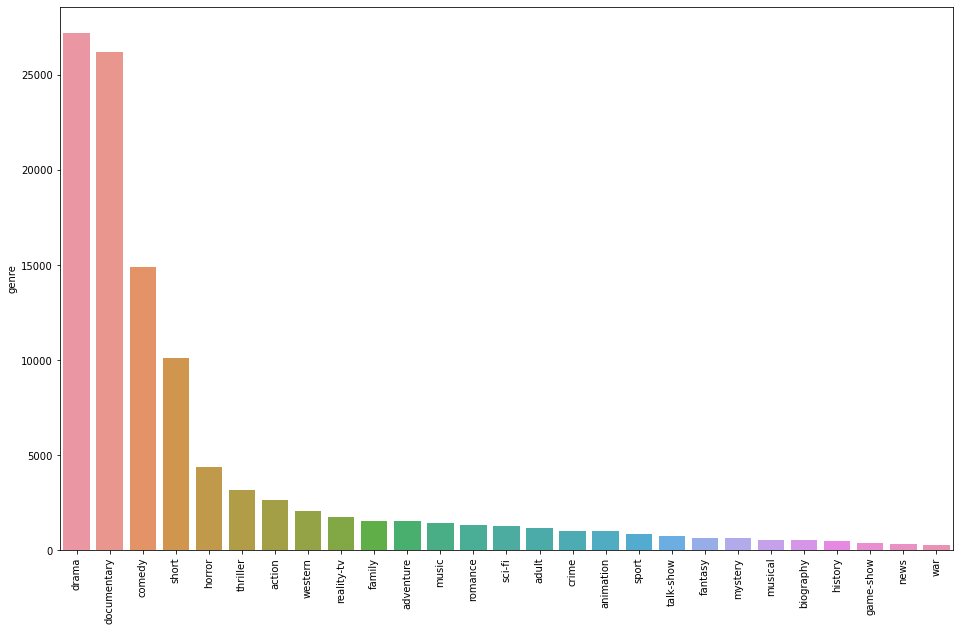

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
counts = df['genre'].value_counts()
plt.xticks(rotation=90);
sns.barplot(x=counts.index, y=counts)
# plt.barh(counts.index, counts.values)
# plt.xlabel('Count')
# plt.ylabel('Genre')
# plt.title('Genre Counts')
# plt.show()

In [21]:
df_test=df

In [22]:
df_test

,genre,summary
81624,biography,masseuse hired massage guests stop house wealt...
31554,documentary,"rael clones december , , ra lian movement anno..."
26553,talk-show,interview ms world canada ramona amiri crowned...
22386,horror,star vehicle star vehicle follows downward spi...
100105,short,"staande debout , vilvoorde, abandoned industri..."
...,...,...
103478,horror,melonheads bryan clark researcher local univer...
61043,comedy,ransom red chief based upon famous henry short...
25483,sport,fifa world cup fifa world cup th fifa world cu...
64842,documentary,"popcenter, legendary rock store popcenter, leg..."


In [23]:
name_map = {"family":"other",
            "fantasy":"other",
            "romance":"other",
            "biography":"other",
            "history":"other",
            "news":"other",
            "reality-tv":"other",
            "talk-show":"other",
            "music":"other",
            "musical":"other",
            "animation":"other",
            "thriller": "horror",
            "adult": "other",
            "adventure":"other",
            "crime": "other",
            "game-show":"other",
            "mystery": "other",
            "sci-fi":"other",
            "sport": "other",
            "war": "other",
            "action": "other",
            "western":"other"
            }
df_test["genre"] = df_test["genre"].replace(name_map)

In [24]:
df_test

,genre,summary
81624,other,masseuse hired massage guests stop house wealt...
31554,documentary,"rael clones december , , ra lian movement anno..."
26553,other,interview ms world canada ramona amiri crowned...
22386,horror,star vehicle star vehicle follows downward spi...
100105,short,"staande debout , vilvoorde, abandoned industri..."
...,...,...
103478,horror,melonheads bryan clark researcher local univer...
61043,comedy,ransom red chief based upon famous henry short...
25483,other,fifa world cup fifa world cup th fifa world cu...
64842,documentary,"popcenter, legendary rock store popcenter, leg..."


<AxesSubplot:ylabel='genre'>

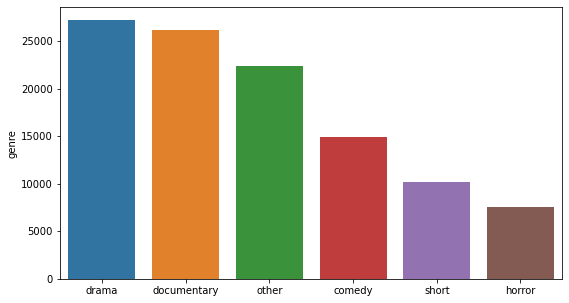

In [25]:
plt.figure(figsize=(9,5))
counts = df_test['genre'].value_counts()
#plt.xticks(rotation=90);
sns.barplot(x=counts.index, y=counts)

In [26]:
print(counts.index)

Index(['drama', 'documentary', 'other', 'comedy', 'short', 'horror'], dtype='object')


In [27]:
print(counts)

drama          27225
documentary    26192
other          22370
comedy         14893
short          10145
horror          7589
Name: genre, dtype: int64


In [28]:
df_test.to_csv('6_genre_data_new.csv', index=False)

In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import numpy as np
import json
import random
from sklearn.pipeline import Pipeline

In [30]:
n_features = 1000
n_components = 5
n_top_words = 20

In [31]:
df_test.head()

,genre,summary
81624,other,masseuse hired massage guests stop house wealt...
31554,documentary,"rael clones december , , ra lian movement anno..."
26553,other,interview ms world canada ramona amiri crowned...
22386,horror,star vehicle star vehicle follows downward spi...
100105,short,"staande debout , vilvoorde, abandoned industri..."


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X1 = vectorizer.fit_transform(df_test.summary)
X1.shape

(108414, 197596)

In [33]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english', ngram_range=(1, 2))
tf = tf_vectorizer.fit_transform(df_test.summary)

In [34]:
tf.shape

(108414, 1000)

In [35]:
tf_vectorizer2 = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2))
tf2 = tf_vectorizer2.fit_transform(df_test.summary)
tf2.shape

(108414, 647619)

In [36]:
#lda = (n_components=n_components, random_state=1).fit(tf)

In [37]:
lda = LatentDirichletAllocation(n_components=5,random_state=0)

In [38]:
lda.fit(tf2)

LatentDirichletAllocation(n_components=5, random_state=0)

In [52]:
# Print the topics and the top words associated with each topic
for idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % idx)
    #print(topic)
    print(", ".join([tf_vectorizer2.get_feature_names()[i] for i in topic.argsort()[:-11:-1]]))
    print()

Topic #0:
young, life, love, man, mother, woman, girl, father, new, old

Topic #1:
man, family, la, war, son, town, father, money, life, young

Topic #2:
film, life, world, story, people, documentary, time, new, music, years

Topic #3:
family, life, old, love, father, friends, day, time, home, years

Topic #4:
world, film, new, documentary, team, people, series, american, story, war



In [54]:
tf_vectorizer3 = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf3 = tf_vectorizer3.fit_transform(df_test.summary)
tf3.shape

(108414, 83629)

In [56]:
lda3 = LatentDirichletAllocation(n_components=5,random_state=0)

In [59]:
lda3.fit(tf3)

LatentDirichletAllocation(n_components=5, random_state=0)

In [60]:
for idx, topic in enumerate(lda3.components_):
    print("Topic #%d:" % idx)
    #print(topic)
    print(", ".join([tf_vectorizer3.get_feature_names()[i] for i in topic.argsort()[:-11:-1]]))
    print()

Topic #0:
film, world, life, documentary, story, people, new, time, music, years

Topic #1:
hong, korean, jin, kong, li, korea, min, china, ji, su

Topic #2:
la, et, le, vs, les, une, des, du, son, village

Topic #3:
life, man, young, love, family, father, old, girl, woman, wife

Topic #4:
di, la, bondage, il, gagged, una, che, contestants, contestant, bound



In [63]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')),
    ('lda', LatentDirichletAllocation(n_components=10, random_state=1))
])

pipeline.fit(df_test.summary)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')),
                ('lda', LatentDirichletAllocation(random_state=1))])

In [65]:
document_topics = pipeline.transform(df_test.summary)

# Print the topics and the top words associated with each topic
for idx, topic in enumerate(pipeline.named_steps['lda'].components_):
    print("Topic #%d:" % idx)
    print(", ".join([pipeline.named_steps['tfidf'].get_feature_names()[i] for i in topic.argsort()[:-11:-1]]))
    print()

Topic #0:
gogh, lon, windermere, belize, kalle, telethon, cnbc, todor, alejandra, apps

Topic #1:
hong, kong, chen, li, ming, liu, china, japanese, yi, wang

Topic #2:
man, love, young, life, father, family, wife, girl, mother, woman

Topic #3:
di, il, che, la, una, si, del, della, da, gli

Topic #4:
fei, fidel, margo, hua, xiao, qi, ren, li, yin, stony

Topic #5:
grammy, tibet, recording, tibetan, dalai, lama, academy, viola, holmes, emmanuelle

Topic #6:
film, life, world, story, new, people, documentary, time, years, family

Topic #7:
la, et, le, les, en, une, des, qui, que, est

Topic #8:
music, game, tv, vs, series, live, team, comedy, contestants, special

Topic #9:
hoon, irina, avinash, susana, gauri, masha, kyeong, lizzie, ester, yeti



In [66]:
for idx, topic in enumerate(pipeline.named_steps['lda'].components_):
    print("Topic #%d:" % idx)
    print(", ".join([pipeline.named_steps['tfidf'].get_feature_names()[i] for i in topic.argsort()[:-22:-1]]))
    print()

Topic #0:
gogh, lon, windermere, belize, kalle, telethon, cnbc, todor, alejandra, apps, nadine, porky, camilo, hajj, liv, medicare, amazonia, sy, birdman, juke, dresden

Topic #1:
hong, kong, chen, li, ming, liu, china, japanese, yi, wang, fu, wen, vanya, feng, qing, astrov, wong, wu, ying, lin, shi

Topic #2:
man, love, young, life, father, family, wife, girl, mother, woman, old, daughter, finds, son, friend, home, husband, new, house, gets, friends

Topic #3:
di, il, che, la, una, si, del, della, da, gli, ed, non, alla, ha, lo, giovanni, le, sua, dei, uno, nel

Topic #4:
fei, fidel, margo, hua, xiao, qi, ren, li, yin, stony, fresco, snoop, oleg, yu, yi, xing, jie, jia, lin, zhi, gao

Topic #5:
grammy, tibet, recording, tibetan, dalai, lama, academy, viola, holmes, emmanuelle, krupinsky, lash, aditya, olivia, brennan, sherlock, samad, authorized, valeria, holiness, verdi

Topic #6:
film, life, world, story, new, people, documentary, time, years, family, young, lives, love, war, man, j

In [67]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')),
    ('lda', LatentDirichletAllocation(n_components=100, random_state=1))
])

pipeline.fit(df_test.summary)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')),
                ('lda',
                 LatentDirichletAllocation(n_components=100, random_state=1))])

In [68]:
for idx, topic in enumerate(pipeline.named_steps['lda'].components_):
    print("Topic #%d:" % idx)
    print(", ".join([pipeline.named_steps['tfidf'].get_feature_names()[i] for i in topic.argsort()[:-10:-1]]))
    print()

Topic #0:
orson, welles, muriel, gogh, dixon, glue, faceless, sunlight, gladiator

Topic #1:
olga, meth, natasha, bible, stanley, percy, abe, crystal, tesla

Topic #2:
ninja, min, tae, claudia, johan, jang, pigeons, jose, sang

Topic #3:
surf, surfing, surfers, lenny, carrie, diabetes, zulu, waves, donnie

Topic #4:
flip, ruby, ashley, tracy, peggy, vanya, audrey, astrov, hye

Topic #5:
benny, bullies, bully, vinnie, panda, kingpin, kyoko, trekking, javier

Topic #6:
film, documentary, music, world, new, life, art, story, interviews

Topic #7:
vijay, chess, voting, brooke, gong, liam, magicians, nominations, marcello

Topic #8:
contestant, contestants, game, round, tennis, answer, correct, luc, guess

Topic #9:
gang, ranch, sheriff, jim, outlaw, town, horse, gold, qv

Topic #10:
poker, salem, cory, mozart, calvin, celtic, amelia, genie, sherman

Topic #11:
korean, kim, korea, jin, ji, ho, seoul, ranch, lee

Topic #12:
vs, wwe, match, title, shawn, kamal, championship, hardy, emil

Topi

In [69]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.genre)


LabelEncoder()

In [70]:
df['genre'] = le.transform(df.genre)
#df['genre'] = le.fit_transform(df.genre)
df.genre.value_counts()

2    27225
1    26192
4    22370
0    14893
5    10145
3     7589
Name: genre, dtype: int64

In [71]:
list(le.classes_)

['comedy', 'documentary', 'drama', 'horror', 'other', 'short']

In [72]:
list(le.inverse_transform([0, 1, 2, 3, 4]))

['comedy', 'documentary', 'drama', 'horror', 'other']

### Split data

In [78]:
#split the data for training and test

from sklearn.model_selection import train_test_split

X = df_test['summary']
y = df_test['genre']

# Split the data into training and testing sets, stratifying by y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (86731,)
X_test dimension=  (21683,)
y_train dimension=  (86731,)
y_test dimension=  (21683,)


In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')),
    ('lda', LatentDirichletAllocation(n_components=100, random_state=1)),
    ('clf', MultinomialNB(fit_prior=True, class_prior=None, alpha=0.01))
])



In [80]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'lda', 'clf', 'tfidf__analyzer', 'tfidf__binary', 'tfidf__decode_error', 'tfidf__dtype', 'tfidf__encoding', 'tfidf__input', 'tfidf__lowercase', 'tfidf__max_df', 'tfidf__max_features', 'tfidf__min_df', 'tfidf__ngram_range', 'tfidf__norm', 'tfidf__preprocessor', 'tfidf__smooth_idf', 'tfidf__stop_words', 'tfidf__strip_accents', 'tfidf__sublinear_tf', 'tfidf__token_pattern', 'tfidf__tokenizer', 'tfidf__use_idf', 'tfidf__vocabulary', 'lda__batch_size', 'lda__doc_topic_prior', 'lda__evaluate_every', 'lda__learning_decay', 'lda__learning_method', 'lda__learning_offset', 'lda__max_doc_update_iter', 'lda__max_iter', 'lda__mean_change_tol', 'lda__n_components', 'lda__n_jobs', 'lda__perp_tol', 'lda__random_state', 'lda__topic_word_prior', 'lda__total_samples', 'lda__verbose', 'clf__alpha', 'clf__class_prior', 'clf__fit_prior'])

In [82]:
X_train

97093    behind every door stacy broke cheating boyfrie...
58815    el milagro de p tinto wafer factory owner p ti...
49300    behind locked doors behind locked doors invest...
57679    happy ghettoes rio de janeiro, graffiti artist...
91664    together forever rich, rebellious boy spends s...
                               ...                        
62291    thicker water thicker water documentary surf f...
27736    confession moazzam begg experienced generation...
1393     last days cinema cinemas city closing doors, r...
99693    perdidos numa noite suja paco tonho illegal br...
87461    trente tableaux paule baillargeon years old, y...
Name: summary, Length: 86731, dtype: object

In [83]:
y_train

97093    3
58815    0
49300    1
57679    1
91664    4
        ..
62291    1
27736    1
1393     5
99693    2
87461    1
Name: genre, Length: 86731, dtype: int64

In [84]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')),
                ('lda',
                 LatentDirichletAllocation(n_components=100, random_state=1)),
                ('clf', MultinomialNB(alpha=0.01))])

In [85]:
y_pred1 = pipeline.predict(X_test)

In [86]:
y_pred1

array([2, 2, 1, ..., 1, 2, 2])

In [87]:
genre_pred=list(le.inverse_transform(y_pred1))

In [88]:
genre_pred

['drama',
 'drama',
 'documentary',
 'drama',
 'documentary',
 'other',
 'drama',
 'other',
 'drama',
 'drama',
 'documentary',
 'documentary',
 'documentary',
 'other',
 'documentary',
 'drama',
 'drama',
 'documentary',
 'drama',
 'drama',
 'other',
 'drama',
 'drama',
 'drama',
 'drama',
 'drama',
 'other',
 'drama',
 'documentary',
 'drama',
 'drama',
 'documentary',
 'documentary',
 'drama',
 'drama',
 'documentary',
 'documentary',
 'documentary',
 'documentary',
 'drama',
 'documentary',
 'documentary',
 'drama',
 'drama',
 'drama',
 'documentary',
 'drama',
 'other',
 'other',
 'drama',
 'documentary',
 'documentary',
 'documentary',
 'drama',
 'drama',
 'drama',
 'documentary',
 'drama',
 'drama',
 'documentary',
 'drama',
 'documentary',
 'documentary',
 'documentary',
 'documentary',
 'drama',
 'drama',
 'documentary',
 'drama',
 'documentary',
 'drama',
 'documentary',
 'documentary',
 'drama',
 'drama',
 'drama',
 'other',
 'drama',
 'documentary',
 'drama',
 'drama',
 'dr

In [89]:
y_proba1 = pipeline.predict_proba(X_test)

In [90]:
classes = pipeline.classes_
classes

array([0, 1, 2, 3, 4, 5])

In [91]:
y_proba1

array([[0.14456081, 0.15740102, 0.32456955, 0.08431257, 0.19083453,
        0.09832153],
       [0.17398578, 0.13288673, 0.26538511, 0.08510685, 0.25494612,
        0.08768941],
       [0.1157623 , 0.28038482, 0.22557837, 0.06159789, 0.22489779,
        0.09177884],
       ...,
       [0.08163893, 0.37928256, 0.20774059, 0.04413093, 0.18899579,
        0.09821119],
       [0.1559191 , 0.15138422, 0.30671768, 0.08881303, 0.20056541,
        0.09660056],
       [0.14704678, 0.22521401, 0.26126638, 0.06036338, 0.21516562,
        0.09094383]])

In [92]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba1, labels = classes, multi_class = 'ovr', average = 'macro')

0.6991493195584537

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2979
           1       0.51      0.81      0.63      5238
           2       0.37      0.83      0.51      5445
           3       0.00      0.00      0.00      1518
           4       0.45      0.12      0.19      4474
           5       0.00      0.00      0.00      2029

    accuracy                           0.43     21683
   macro avg       0.22      0.29      0.22     21683
weighted avg       0.31      0.43      0.32     21683



/Users/guofengyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/guofengyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/guofengyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
pipeline2 = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')),
    ('lda', LatentDirichletAllocation(n_components=10, random_state=1)),
    ('clf', MultinomialNB(fit_prior=True, class_prior=None, alpha=0.01))
])

In [95]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')),
                ('lda', LatentDirichletAllocation(random_state=1)),
                ('clf', MultinomialNB(alpha=0.01))])

In [96]:
y_pred2 = pipeline2.predict(X_test)

In [97]:
y_proba2 = pipeline2.predict_proba(X_test)

In [98]:
y_pred2

array([2, 2, 2, ..., 2, 2, 2])

In [99]:
y_proba2

array([[0.13641705, 0.23654708, 0.26556789, 0.07414601, 0.19300031,
        0.09432166],
       [0.13670052, 0.23849256, 0.26442594, 0.0750156 , 0.19002849,
        0.0953369 ],
       [0.13939773, 0.23834934, 0.26017126, 0.0708231 , 0.19555197,
        0.0957066 ],
       ...,
       [0.13738775, 0.23847584, 0.26254864, 0.07382395, 0.19256025,
        0.09520357],
       [0.13829313, 0.24349084, 0.25180733, 0.06985127, 0.20071715,
        0.09584027],
       [0.13682363, 0.23849072, 0.26409136, 0.07480192, 0.19047881,
        0.09531358]])

In [100]:
roc_auc_score(y_test, y_proba2, labels = classes, multi_class = 'ovr', average = 'macro')

0.5732274120249811

In [101]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2979
           1       0.33      0.19      0.24      5238
           2       0.28      0.93      0.43      5445
           3       0.00      0.00      0.00      1518
           4       0.50      0.09      0.16      4474
           5       0.00      0.00      0.00      2029

    accuracy                           0.30     21683
   macro avg       0.19      0.20      0.14     21683
weighted avg       0.25      0.30      0.20     21683



/Users/guofengyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/guofengyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/guofengyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
